## Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

# Data reading and profiling

### importing our dataset.

In [2]:
Data = pd.read_csv('Heart_Disease_Prediction.csv')

print( 'Shape of DataFrame:', Data.shape)

Shape of DataFrame: (270, 14)


### checking first five rows

In [3]:
Data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### checking last five rows

In [4]:
Data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [5]:
Data.columns = ['Age','Sex','Chest_pain_type', 'Blood_pressure','Cholesterol','Fasting_blood_sugar_over_120','EKG_results',
'Max_heart_rate_achieved','Exercise_angina','ST_depression','Slope_of_ST','Number_of_vessels_fluro',
'Thallium','Heart_disease']
Data['Sex']=Data['Sex'].replace(to_replace=[0,1],
           value=['femal','male'])

Data['Chest_pain_type']=Data['Chest_pain_type'].replace(to_replace=[1,2,3,4],
           value=['TA','ATA','NAP','ASY'])

Data['Heart_disease']=Data['Heart_disease'].replace(to_replace=['Absence','Presence'],
           value=['No heart Disease','Heart Disease'])


### concise summary of our dataset.

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           270 non-null    int64  
 1   Sex                           270 non-null    object 
 2   Chest_pain_type               270 non-null    object 
 3   Blood_pressure                270 non-null    int64  
 4   Cholesterol                   270 non-null    int64  
 5   Fasting_blood_sugar_over_120  270 non-null    int64  
 6   EKG_results                   270 non-null    int64  
 7   Max_heart_rate_achieved       270 non-null    int64  
 8   Exercise_angina               270 non-null    int64  
 9   ST_depression                 270 non-null    float64
 10  Slope_of_ST                   270 non-null    int64  
 11  Number_of_vessels_fluro       270 non-null    int64  
 12  Thallium                      270 non-null    int64  
 13  Heart

In [7]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Blood_pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
Fasting_blood_sugar_over_120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max_heart_rate_achieved,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST_depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2
Slope_of_ST,270.0,1.585185,0.614390,1.0,1.0,2.0,2.0,3.0
Number_of_vessels_fluro,270.0,0.670370,0.943896,0.0,0.0,0.0,1.0,3.0


### checking for null values

In [8]:
Data.isna().sum()

Age                             0
Sex                             0
Chest_pain_type                 0
Blood_pressure                  0
Cholesterol                     0
Fasting_blood_sugar_over_120    0
EKG_results                     0
Max_heart_rate_achieved         0
Exercise_angina                 0
ST_depression                   0
Slope_of_ST                     0
Number_of_vessels_fluro         0
Thallium                        0
Heart_disease                   0
dtype: int64

### Checking if there are duplicates

In [9]:
Data.duplicated().sum()

0

### Profiling the data frame 

In [10]:
profile=ProfileReport(Data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data ploting

### plotting histogram of all numeric values

choose a style

In [11]:
plt.style.use('Solarize_Light2')

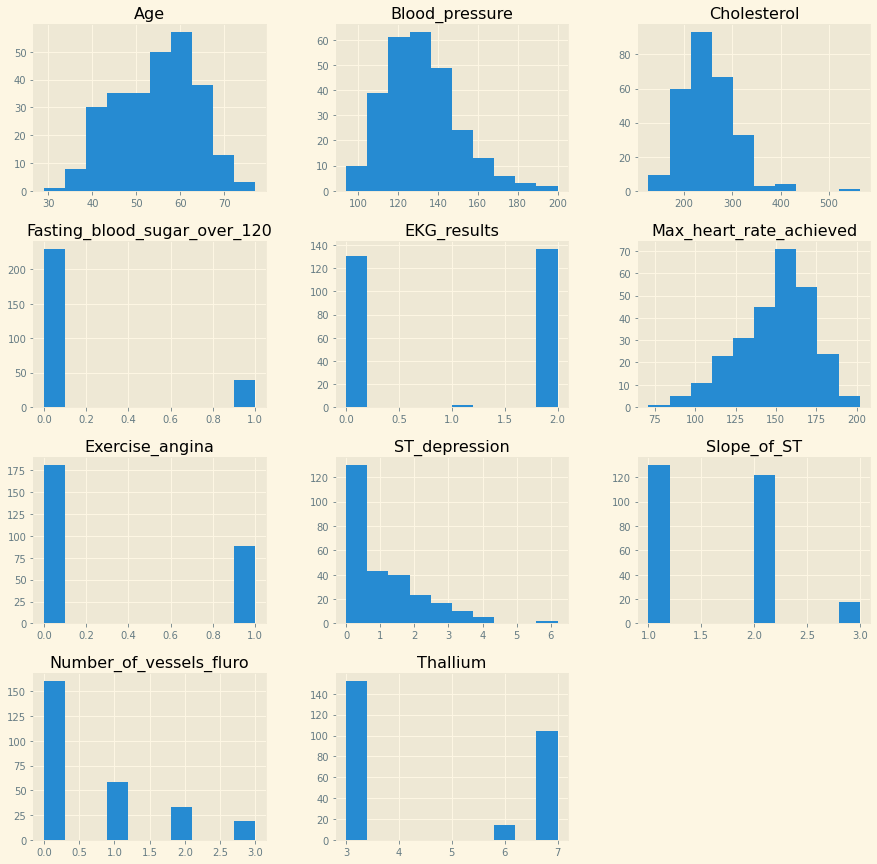

In [14]:
Data.hist(figsize = (15, 15))
plt.show()

## How many people have heart disease and how many people doesn't have heart disease?

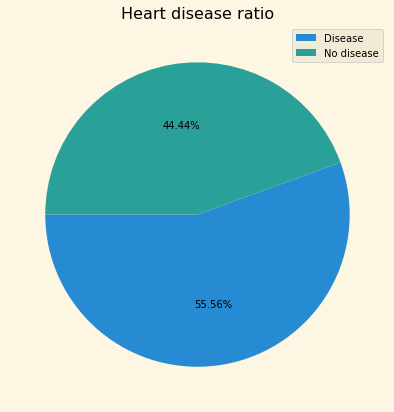

In [20]:
plt.figure(figsize=(7,7))
plt.pie(Data.Heart_disease.value_counts(), autopct='%1.2f%%',  startangle=180)
plt.title('Heart disease ratio')
plt.legend(["Disease", "No disease"]);

### In diseased states, we concluded that, from a total of 270 instances,  55.56% patients had a heart disease problem and 44.44% are normal out of the total instances. 

### Number of males and females

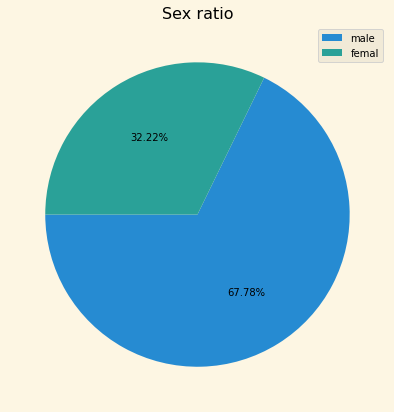

In [21]:
plt.figure(figsize=(7,7))
plt.pie(Data.Sex.value_counts(), autopct='%1.2f%%',  startangle=180)
plt.title('Sex ratio')
plt.legend(["male", "femal"]);

 ## Which sex has most heart disease?

In [22]:
pd.crosstab(Data.Heart_disease,Data.Sex)

Sex,femal,male
Heart_disease,,
Heart Disease,20,100
No heart Disease,67,83


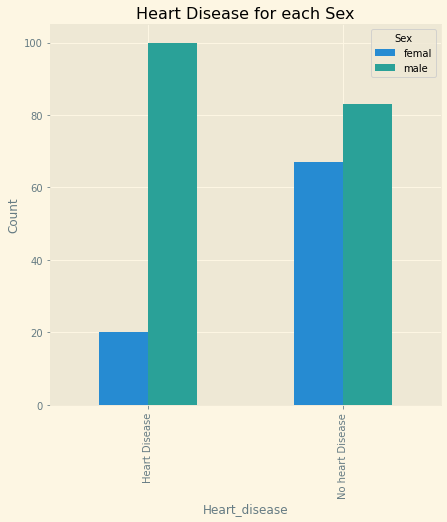

In [29]:
pd.crosstab(Data.Heart_disease,Data.Sex).plot(kind="bar",figsize=(7,7));
plt.title("Heart Disease for each Sex")
plt.ylabel("Count");

### Rate heart disease in males more than in female

## Which Average Age for sex and heart disease?

In [30]:
pd.crosstab(Data.Heart_disease,Data.Sex,values=Data.Age, aggfunc=np.average)

Sex,femal,male
Heart_disease,,
Heart Disease,59.35000,56.040000
No heart Disease,54.58209,51.192771


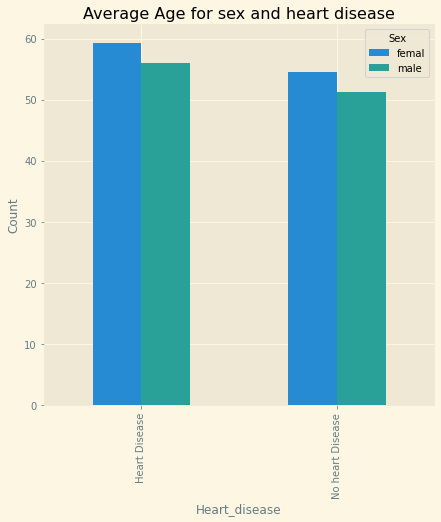

In [31]:
#Average Age
pd.crosstab(Data.Heart_disease,Data.Sex,values=Data.Age, aggfunc=np.average).plot(kind="bar",figsize=(7,7))
plt.title('Average Age for sex and heart disease',color='black')
plt.ylabel('Count');                                                                                                                                                                                 

### Risk of heart disease goes up as you get older

### What type of chest pain is more common in any sex?

In [32]:
pd.crosstab(Data.Sex[Data.Heart_disease=='Heart Disease'], Data.Chest_pain_type[Data.Heart_disease=='Heart Disease'])

Chest_pain_type,ASY,ATA,NAP,TA
Sex,,,,
femal,18,1,1,0
male,73,6,16,5


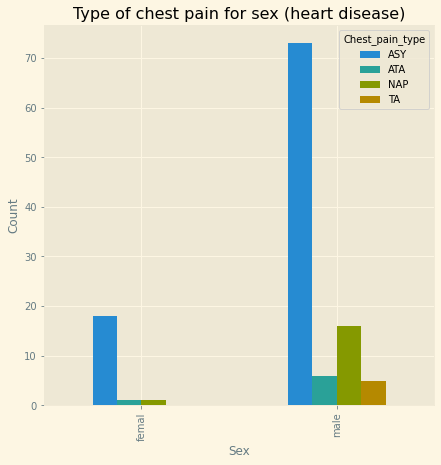

In [34]:
pd.crosstab(Data.Sex[Data.Heart_disease=='Heart Disease'], Data.Chest_pain_type[Data.Heart_disease=='Heart Disease']).plot(kind = 'bar',figsize=(7,7))
plt.title('Type of chest pain for sex (heart disease)')
plt.xlabel('Sex');
plt.ylabel('Count');

### ASY type chest pain is popular in male and female 

## When people have heart disease, what is the age vs. maximum heart rate achieved?
## When people do not have heart disease, what is the age vs. maximum heart rate achieved?

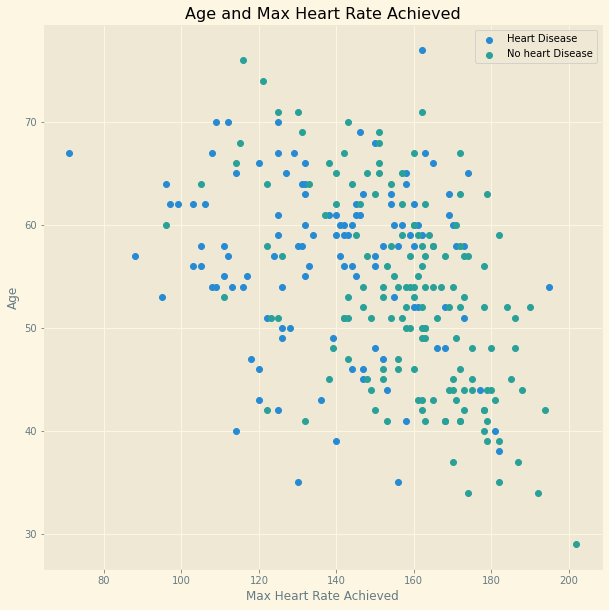

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(Data.Max_heart_rate_achieved[Data.Heart_disease=='Heart Disease'],  
            Data.Age[Data.Heart_disease=='Heart Disease']) 
plt.scatter(Data.Max_heart_rate_achieved[Data.Heart_disease=='No heart Disease'], 
            Data.Age[Data.Heart_disease=='No heart Disease']) 
plt.title("Age and Max Heart Rate Achieved")
plt.xlabel("Max Heart Rate Achieved")
plt.ylabel("Age");
plt.legend(["Heart Disease", "No heart Disease"])
plt.show()

### Heart Disease is heartbeat too fast or too slow

### Fasting blood sugar above 120 for both sexes with heart disease

In [36]:
pd.crosstab(Data.Sex[Data.Heart_disease=='Heart Disease'], Data.Fasting_blood_sugar_over_120[Data.Heart_disease=='Heart Disease'])

Fasting_blood_sugar_over_120,0,1
Sex,,
femal,15,5
male,88,12


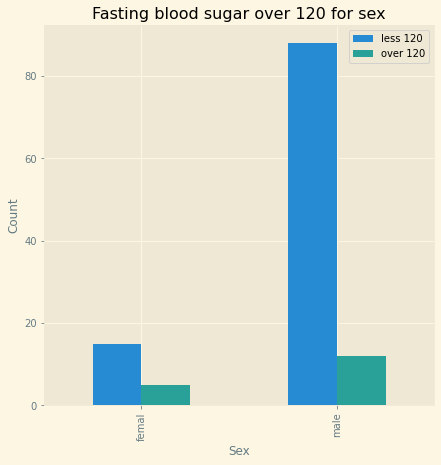

In [38]:
pd.crosstab(Data.Sex[Data.Heart_disease=='Heart Disease'], Data.Fasting_blood_sugar_over_120[Data.Heart_disease=='Heart Disease']).plot(kind = 'bar',figsize=(7,7))
plt.title('Fasting blood sugar over 120 for sex')
plt.xlabel('Sex');
plt.ylabel('Count');  
plt.legend(["less 120", "over 120"]);
plt.show()

### For both sexes with heart disease is less than 120

change the style

In [39]:
plt.style.use('Solarize_Light2')

### **Average cholesterol for ones that  having heart disease and for ones that not having heart disease**

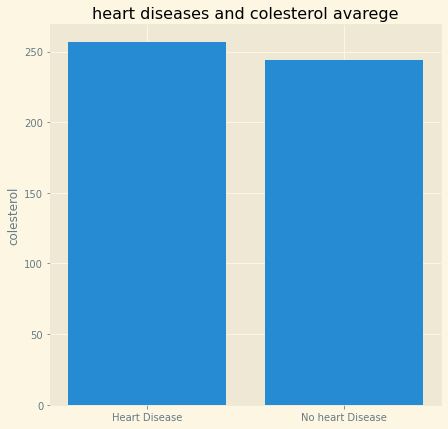

In [41]:
Cholesterol_positive=Data[Data['Heart_disease']=='Heart Disease']['Cholesterol'].mean()
Cholesterol_negative=Data[Data['Heart_disease']=='No heart Disease']['Cholesterol'].mean()
plt.figure(figsize=(7,7))
plt.bar(Data['Heart_disease'].unique(),[Cholesterol_positive,Cholesterol_negative])
plt.title('heart diseases and colesterol avarege')
plt.ylabel('colesterol')
plt.show()

### **correlation matrix and correlation heatmap**

In [42]:
corr=Data.corr()
corr

,Age,Blood_pressure,Cholesterol,Fasting_blood_sugar_over_120,EKG_results,Max_heart_rate_achieved,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium
Age,1.000000,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Blood_pressure,0.273053,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
Fasting_blood_sugar_over_120,0.123458,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG_results,0.128171,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max_heart_rate_achieved,-0.402215,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise_angina,0.098297,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST_depression,0.194234,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333
Slope_of_ST,0.159774,0.142472,-0.005755,0.044076,0.160614,-0.386847,0.255908,0.609712,1.000000,0.109498,0.283678
Number_of_vessels_fluro,0.356081,0.085697,0.126541,0.123774,0.114368,-0.265333,0.153347,0.255005,0.109498,1.000000,0.255648


change the style

In [43]:
plt.style.use('seaborn-v0_8-dark')

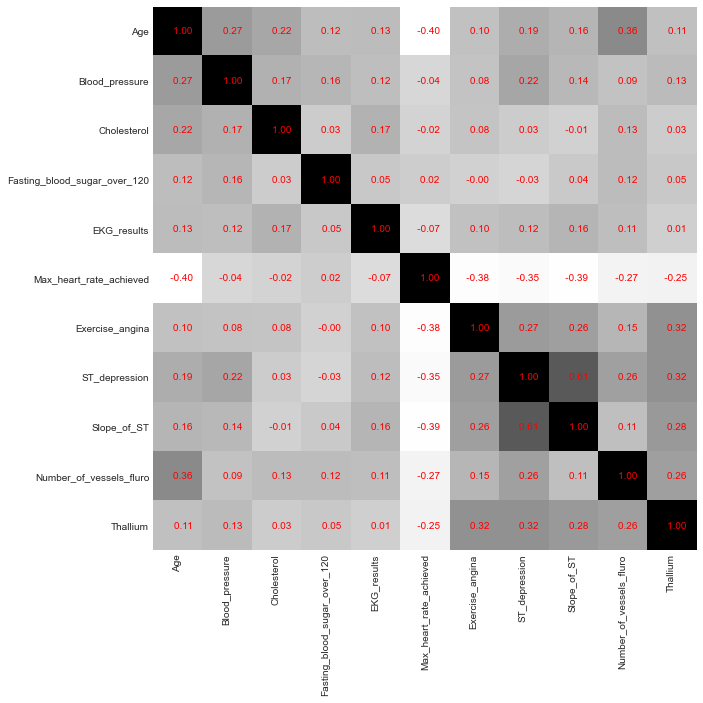

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(Data.corr())
plt.xticks(np.arange(corr.shape[0]), labels=corr.columns,rotation = 90)
plt.yticks(np.arange(corr.shape[1]), labels=corr.columns)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = plt.text(j, i, '{p:8.2f}'.format(p=corr.values[i, j]),
                       ha="center", va="center", color="r")

### **plot scatter plots for high correlated and zero correlated variables**

In [45]:
def corr_mat(corr):
    lst=[]
    mn=1
    mx=-1
    abs_min=1
    indx_max=[]
    indx_min=[]
    indx_abs=[]
    for i, row in corr.iterrows():
        for column in row.index:
            if row[column] == 1:
                continue
            if row[column]>mx:
                mx=row[column]
                indx_max=[i,column]
            if row[column]<mn:
                mn=row[column]
                indx_min=[i,column]
            if np.abs(row[column]) < abs_min:
                abs_min=row[column]
                indx_abs=[i,column]
    return indx_max,indx_min,indx_abs

In [46]:
mx,mn,abs_min=corr_mat(corr)

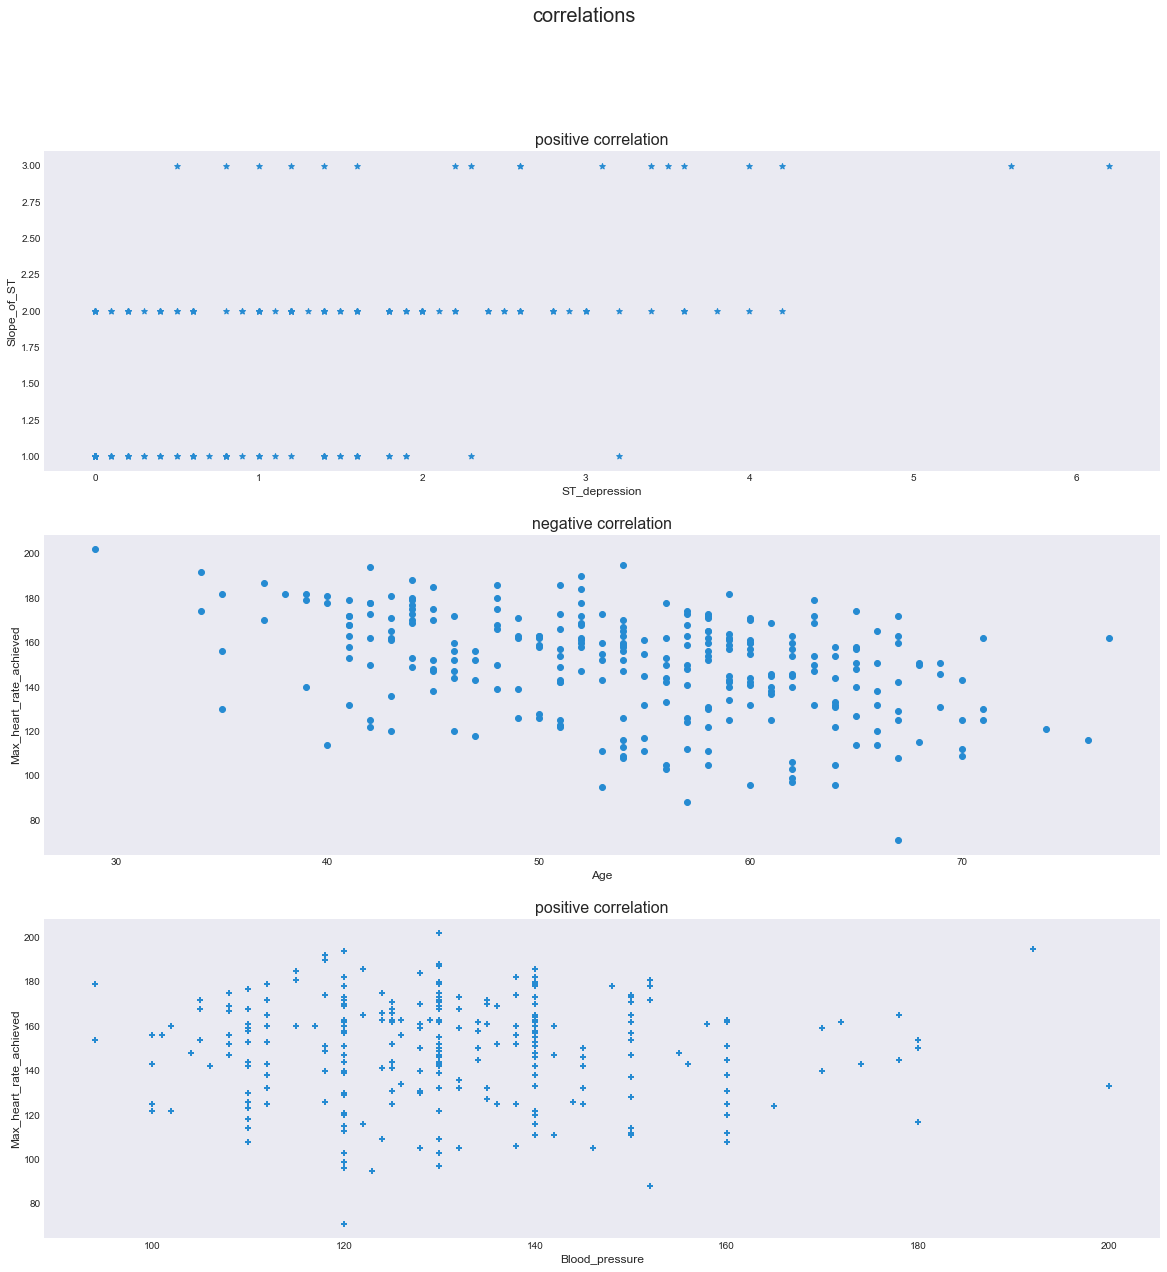

In [47]:
plt.figure(figsize=(20,20))
plt.suptitle('correlations',fontsize=20)
plt.subplot(3,1,1)
plt.scatter(Data[mx[0]],Data[mx[1]],marker='*')
plt.xlabel(mx[0])
plt.ylabel(mx[1])
plt.title('positive correlation')

plt.subplot(3,1,2)
plt.scatter(Data[mn[0]],Data[mn[1]],marker='o')
plt.xlabel(mn[0])
plt.ylabel(mn[1])
plt.title('negative correlation')

plt.subplot(3,1,3)
plt.scatter(Data[abs_min[0]],Data[abs_min[1]],marker='+')
plt.xlabel(abs_min[0])
plt.ylabel(abs_min[1])
plt.title('positive correlation');

change the style

In [48]:
plt.style.use('Solarize_Light2')

### **line chart for max heart rate and age**

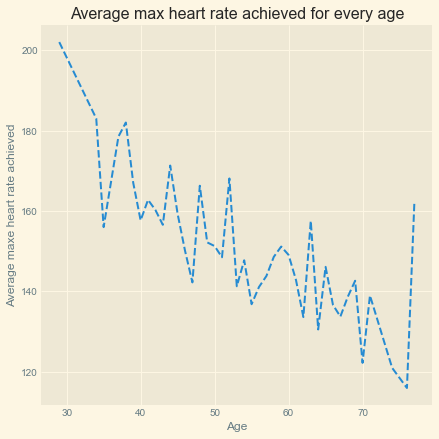

In [52]:
ages=Data.groupby('Age')['Max_heart_rate_achieved'].mean()
plt.figure(figsize=(7,7))
plt.plot(ages.index,ages,linestyle='--')
plt.title('Average max heart rate achieved for every age')
plt.xlabel('Age')
plt.ylabel('Average maxe heart rate achieved')
plt.show()

### Average ST depression for sex and heart disease

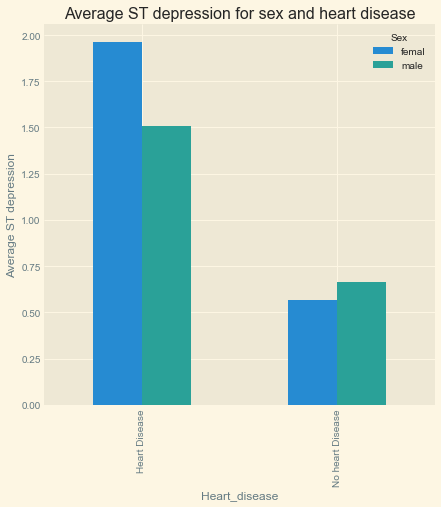

In [51]:
pd.crosstab(Data.Heart_disease,Data.Sex,values=Data.ST_depression, aggfunc=np.average).plot(kind="bar",figsize=(7,7))
plt.title('Average ST depression for sex and heart disease')
plt.ylabel('Average ST depression');      

### line chart for BP and age

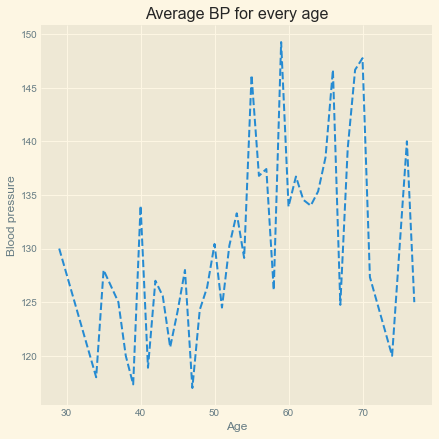

In [53]:
ages=Data.groupby('Age')['Blood_pressure'].mean()
plt.figure(figsize=(7,7))
plt.plot(ages.index,ages,linestyle='--')
plt.title('Average BP for every age')
plt.xlabel('Age')
plt.ylabel('Blood pressure')
plt.show()

### Average cholesterol for both sex¶

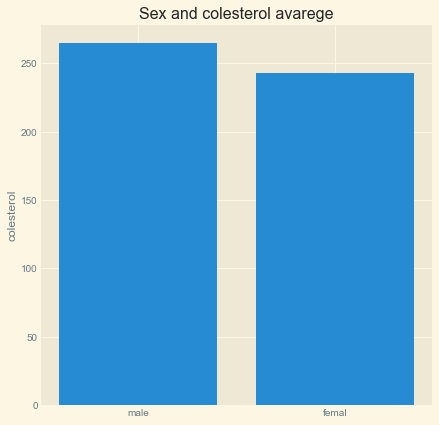

In [54]:
Cholesterol_positive=Data[Data['Sex']=='femal']['Cholesterol'].mean()
Cholesterol_negative=Data[Data['Sex']=='male']['Cholesterol'].mean()
plt.figure(figsize=(7,7))
plt.bar(Data['Sex'].unique(),[Cholesterol_positive,Cholesterol_negative])
plt.title('Sex and colesterol avarege')
plt.ylabel('colesterol')
plt.show()